In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [2]:
import datetime as dt

In [3]:
#2021년3월2일
dt.datetime(2021,3,2)

datetime.datetime(2021, 3, 2, 0, 0)

In [4]:
now = dt.datetime.now()

In [5]:
now

datetime.datetime(2021, 7, 9, 13, 57, 31, 601419)

In [6]:
# timezon 지정해서 날짜 생성
dt.datetime(2021,3,2,13,50, tzinfo=dt.timezone.utc)

datetime.datetime(2021, 3, 2, 13, 50, tzinfo=datetime.timezone.utc)

In [7]:
dt.datetime.now(tz=dt.timezone.utc)

datetime.datetime(2021, 7, 9, 4, 59, 10, 390331, tzinfo=datetime.timezone.utc)

In [8]:
now.astimezone(dt.timezone.utc)

datetime.datetime(2021, 7, 9, 4, 57, 31, 601419, tzinfo=datetime.timezone.utc)

## 1.2 timedelta 를 활용한 시간 계산

In [9]:
from datetime import timedelta

In [10]:
# 현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days=100)

datetime.datetime(2021, 10, 17, 13, 57, 31, 601419)

In [11]:
# 현재 시간 기준으로 1시간 25분 후의 시간
now + timedelta(hours=1, minutes=25)

datetime.datetime(2021, 7, 9, 15, 22, 31, 601419)

In [12]:
# 두 날짜 간의 차이 계산
dt1 = dt.datetime(2021,3,2,9,30)
dt2 = dt.datetime(2023,5,18,13,15)

In [14]:
diff= dt2-dt1

In [15]:
diff

datetime.timedelta(days=807, seconds=13500)

In [17]:
#시간
diff.seconds//3600

3

In [19]:
#분
diff.seconds/60%60

45.0

## 1.3 시계열 데이터 처리

In [20]:
import random
import pandas as pd
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [22]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    500 non-null    datetime64[ns]
 1   count   500 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB


In [23]:
sample.describe()

,count
count,500.000000
mean,501.458000
std,289.127047
min,5.000000
25%,255.750000
50%,521.500000
75%,750.250000
max,997.000000


In [26]:
sample.date.min()

Timestamp('2021-01-01 00:00:00')

In [29]:
sample.date.max()

Timestamp('2022-05-15 00:00:00')

In [31]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용
sample[(sample.date >= '2021-07-01')&(sample.date <'2021-07-31')]

,date,count
181,2021-07-01,68
182,2021-07-02,887
183,2021-07-03,799
184,2021-07-04,814
185,2021-07-05,155
186,2021-07-06,912
187,2021-07-07,821
188,2021-07-08,356
189,2021-07-09,933
190,2021-07-10,516


In [34]:
pd.date_range(start='2021-07-01', end='2021-07-31')

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용
sample[sample.date.isin(pd.date_range(start='2021-07-01', end='2021-07-31'))]

,date,count
181,2021-07-01,68
182,2021-07-02,887
183,2021-07-03,799
184,2021-07-04,814
185,2021-07-05,155
186,2021-07-06,912
187,2021-07-07,821
188,2021-07-08,356
189,2021-07-09,933
190,2021-07-10,516


In [38]:
# 7월달 데이터마 조회 #3
# datetimeIndex 활용
sample2= sample.set_index('date')

- datetimeIndex 색인

In [40]:
# 2021년 데이터 선택
sample2['2021']

,count
date,
2021-01-01,324
2021-01-02,599
2021-01-03,460
2021-01-04,42
2021-01-05,50
...,...
2021-12-27,645
2021-12-28,220
2021-12-29,916


In [41]:
#2021년 7월 데이터만 선택
sample2['2021-07']
#가능한 이유 : data type: datetime 이기 때문임

,count
date,
2021-07-01,68
2021-07-02,887
2021-07-03,799
2021-07-04,814
2021-07-05,155
2021-07-06,912
2021-07-07,821
2021-07-08,356
2021-07-09,933


In [42]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

,count
date,
2021-03-02,124
2021-03-03,7
2021-03-04,802
2021-03-05,674
2021-03-06,14
2021-03-07,179
2021-03-08,731
2021-03-09,49
2021-03-10,424


In [45]:
# 2021년 4월 28일 데이터 선택
# 특정 날짜를 가져오는 슬라이싱을 하는게 아니기 때문에 loc 붙여야함
sample2.loc['2021-04-28']

count    747
Name: 2021-04-28 00:00:00, dtype: int64

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [47]:
문자열 = '21/08/11'

In [49]:
# 21년 8월 11일로 변환 
dt.datetime.strptime(문자열,'%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [50]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열, '%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [53]:
# 8월 11일 21시로 변환
dt1 =dt.datetime.strptime(문자열,'%H/%m/%d')

In [54]:
#dt1의 year를 202로 업데이터
dt1.replace(year=2021)

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [58]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,2020-07-01,23
1,2020-07-02,97
2,2020-07-05,88
3,2020-07-10,11
4,2020-07-23,57
5,2020-07-24,39
6,2020-07-28,6
7,2020-08-05,18
8,2020-08-10,22
9,2020-08-23,12


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   value   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [61]:
df.set_index('date')['2020-07']
# 오류나는 이유 : data의 값이 object라서 datetime일때만 가능

KeyError: '2020-07'

In [65]:
# df의 date 칼럼의 타입을 datetime으로 변환하기
### 첫번째 방법
df.date.apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))

0   2020-07-01
1   2020-07-02
2   2020-07-05
3   2020-07-10
4   2020-07-23
5   2020-07-24
6   2020-07-28
7   2020-08-05
8   2020-08-10
9   2020-08-23
Name: date, dtype: datetime64[ns]

In [66]:
df['date2'] = df.date.apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [70]:
### 두번째 방법
df['date3'] = pd.to_datetime(df.date, format='%Y-%m-%d')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [74]:
# 7월 데이터만 조회
df.set_index('date2')['2020-07']

,date,value,date3
date2,,,
2020-07-01,2020-07-01,23,2020-07-01
2020-07-02,2020-07-02,97,2020-07-02
2020-07-05,2020-07-05,88,2020-07-05
2020-07-10,2020-07-10,11,2020-07-10
2020-07-23,2020-07-23,57,2020-07-23
2020-07-24,2020-07-24,39,2020-07-24
2020-07-28,2020-07-28,6,2020-07-28


## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [78]:
# now 변수를 4자리년도-월-일 형식으로 출력
# now.strftime('%Y-%m-%d')
dt.datetime.strftime(now,'%Y-%m-%d')

'2021-07-09'

In [80]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('%m-%d %H:%M')

'07-09 13:57'

* Tip. Week와 요일 정보 얻기(strftime)

In [133]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [82]:
df.drop(['date2','date3'],axis=1, inplace=True)

In [84]:
df['date'] = pd.to_datetime(df.date)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [87]:
df

,date,value
0,2020-07-01,23
1,2020-07-02,97
2,2020-07-05,88
3,2020-07-10,11
4,2020-07-23,57
5,2020-07-24,39
6,2020-07-28,6
7,2020-08-05,18
8,2020-08-10,22
9,2020-08-23,12


In [93]:
# 몇주차인지 무슨요일인지 구하기
#df에  week number(%V), weekday(%w) 컬럼 추가
df['weeknumber']=df.date.apply(lambda x:x.strftime('%V'))
df['weekday'] = df.date.apply(lambda x:x.strftime('%a'))

In [94]:
df

,date,value,weeknumber,weekday
0,2020-07-01,23,27,Wed
1,2020-07-02,97,27,Thu
2,2020-07-05,88,27,Sun
3,2020-07-10,11,28,Fri
4,2020-07-23,57,30,Thu
5,2020-07-24,39,30,Fri
6,2020-07-28,6,31,Tue
7,2020-08-05,18,32,Wed
8,2020-08-10,22,33,Mon
9,2020-08-23,12,34,Sun


##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [95]:
df.pivot_table(index='weeknumber', values='value', aggfunc='sum')

,value
weeknumber,
27,208
28,11
30,96
31,6
32,18
33,22
34,12


##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [98]:
df.pivot_table(index='weekday', values='value', aggfunc='sum')

,value
weekday,
Fri,50
Mon,22
Sun,100
Thu,154
Tue,6
Wed,41


## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [99]:
covid = pd.read_excel('data/owid-covid-data.xlsx')

In [101]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [103]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [104]:
covid.info()
# date => object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              67325 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            69938 non-null  float64
 5   new_cases                              69936 non-null  float64
 6   new_cases_smoothed                     68935 non-null  float64
 7   total_deaths                           60914 non-null  float64
 8   new_deaths                             61072 non-null  float64
 9   new_deaths_smoothed                    68935 non-null  float64
 10  total_cases_per_million                69555 non-null  float64
 11  ne

##### 2. date 컬럼을 datetime으로 변경하기

In [106]:
covid.date= pd.to_datetime(covid.date, format = '%Y-%m-%d')

In [107]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               70851 non-null  object        
 1   continent                              67325 non-null  object        
 2   location                               70851 non-null  object        
 3   date                                   70851 non-null  datetime64[ns]
 4   total_cases                            69938 non-null  float64       
 5   new_cases                              69936 non-null  float64       
 6   new_cases_smoothed                     68935 non-null  float64       
 7   total_deaths                           60914 non-null  float64       
 8   new_deaths                             61072 non-null  float64       
 9   new_deaths_smoothed                    68935 non-null  float6

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [108]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

In [109]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9104,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9105,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9106,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9107,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9108,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67543,USA,North America,United States,2021-02-19,28006110.0,106355.0,73405.286,495827.0,2689.0,1898.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67544,USA,North America,United States,2021-02-20,28077620.0,71510.0,71194.714,497648.0,1821.0,1850.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67545,USA,North America,United States,2021-02-21,28134115.0,56495.0,69986.000,498897.0,1249.0,1872.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67546,USA,North America,United States,2021-02-22,28190159.0,56044.0,70281.286,500310.0,1413.0,1937.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


- location, date, total_cases, new_cases 컬럼만 선택

In [110]:
covid = covid[['location','date','total_cases','new_cases']]

In [111]:
covid

,location,date,total_cases,new_cases
9104,Brazil,2020-02-26,1.0,1.0
9105,Brazil,2020-02-27,1.0,0.0
9106,Brazil,2020-02-28,1.0,0.0
9107,Brazil,2020-02-29,2.0,1.0
9108,Brazil,2020-03-01,2.0,0.0
...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0
67544,United States,2021-02-20,28077620.0,71510.0
67545,United States,2021-02-21,28134115.0,56495.0
67546,United States,2021-02-22,28190159.0,56044.0


#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [113]:
# freq ="D" => 매일 생성, freq='M' =>월별로 생성
pd.date_range(start=covid.date.min(), end=covid.date.max(), freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31'],
              dtype='datetime64[ns]', freq='M')

In [118]:
#매월 마지막 날짜만 선택
ex1 = covid[covid.date.isin(pd.date_range(start=covid.date.min(), end=covid.date.max(), freq = 'M'))]

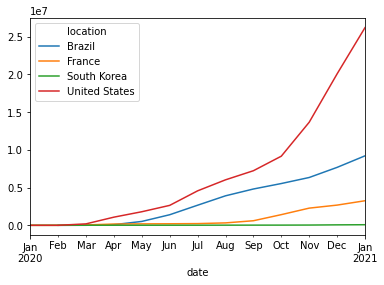

In [123]:
# 시각화
ex1.set_index(['date','location']).unstack()['total_cases'].plot()

- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [124]:
#년도(year),달(month),일(day),주차(weeknumber),요일(weekday),분기(quarter) 칼럼 추가하기

In [128]:
covid['year']=covid.date.apply(lambda x: x.strftime('%Y'))
covid['month']=covid.date.apply(lambda x: x.strftime('%m'))
covid['day']=covid.date.apply(lambda x: x.strftime('%d'))
covid['weeknumber']=covid.date.apply(lambda x: x.strftime('%U'))
covid['weekday']=covid.date.apply(lambda x: x.strftime('%a'))

<ipython-input-128-3203088f8ebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['year']=covid.date.apply(lambda x: x.strftime('%Y'))
<ipython-input-128-3203088f8ebf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['month']=covid.date.apply(lambda x: x.strftime('%m'))
<ipython-input-128-3203088f8ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [130]:
#분기(quarter) 정보 추가
covid['quarter']=covid.date.apply(lambda x: pd.Timestamp(x).quarter)

<ipython-input-130-89fd3f506247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['quarter']=covid.date.apply(lambda x: pd.Timestamp(x).quarter)


In [131]:
covid

,location,date,total_cases,new_cases,year,month,day,weeknumber,weekday,quarter
9104,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed,1
9105,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu,1
9106,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri,1
9107,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat,1
9108,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun,1
...,...,...,...,...,...,...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0,2021,02,19,07,Fri,1
67544,United States,2021-02-20,28077620.0,71510.0,2021,02,20,07,Sat,1
67545,United States,2021-02-21,28134115.0,56495.0,2021,02,21,08,Sun,1
67546,United States,2021-02-22,28190159.0,56044.0,2021,02,22,08,Mon,1


In [133]:
covid.pivot_table(index='weekday',columns= 'location', aggfunc='sum',values='new_cases')

location,Brazil,France,South Korea,United States
weekday,,,,
Fri,1670028.0,626464.0,13001.0,4445369.0
Mon,805163.0,365153.0,11188.0,3629148.0
Sat,1537633.0,573388.0,13012.0,4183584.0
Sun,884578.0,492209.0,11109.0,3504755.0
Thu,1831775.0,593989.0,13246.0,4327143.0
Tue,1715474.0,539431.0,13511.0,4010477.0
Wed,1813224.0,498900.0,13052.0,4161118.0


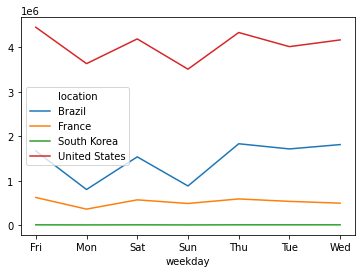

In [135]:
covid.pivot_table(index='weekday',columns= 'location', aggfunc='sum',values='new_cases').plot()

- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

In [134]:
covid.pivot_table(index='quarter',columns= 'location', aggfunc='sum',values='new_cases')

location,Brazil,France,South Korea,United States
quarter,,,,
1,2587619.0,1064146.0,36136.0,8391992.0
2,1396324.0,151966.0,3064.0,2449780.0
3,3408894.0,401649.0,11039.0,4589751.0
4,2865038.0,2071773.0,37880.0,12830071.0


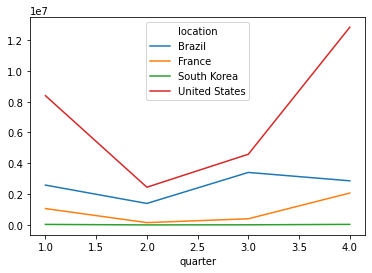

In [137]:
covid.pivot_table(index='quarter',columns= 'location', aggfunc='sum',values='new_cases').plot()

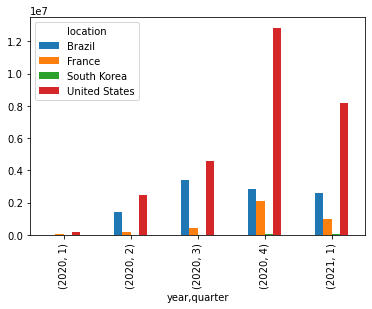

In [139]:
# 1분기는 2020년 데이터부터 2021년데이터까지 다있음
covid.pivot_table(index=['year','quarter'],columns= 'location', aggfunc='sum',values='new_cases').plot(kind='bar')